In [1]:
import os
os.environ["PROJ_LIB"] = r'C:\Users\Mic Mic\anaconda3\pkgs\basemap-1.3.0-py38ha7665c8_0\Library\share\basemap' #fixr

from mpl_toolkits.basemap import Basemap, maskoceans
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
import netCDF4 as nc
import scipy.io as sp
import numpy.random as rnd

## Plot mean RH for strong Amihan days

In [2]:
ph_rh = pd.read_csv('../ph_rh.csv',header=None).values

In [3]:
# norm_rh = ph_rh/ph_rh.max(axis=0)[None,:]
sum_rh = np.mean(ph_rh,axis=1)

norm_sum_rh = np.reshape(sum_rh,(15,13))

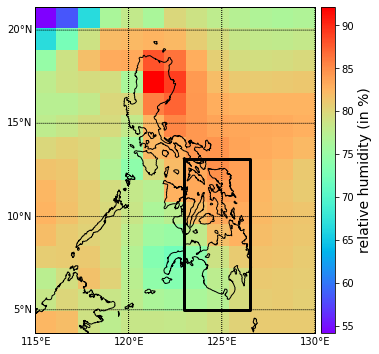

In [4]:
rh_lat = np.arange(3.75,21.5,1.25)
rh_lon = np.arange(115,131,1.25)

plt.figure(figsize=(8,6))

#draw basemap
m = Basemap(projection='cyl',llcrnrlon=115,urcrnrlon=130,llcrnrlat=3.75,urcrnrlat=21.25,resolution='i')
m.drawcoastlines(linewidth=1)
m.drawmapboundary(fill_color='aliceblue')

rh_imshow = m.imshow(np.flip(norm_sum_rh,axis=0),cmap='rainbow',zorder=1)

#draw latitudes and longitudes
parallels = np.arange(5,21,5)
m.drawparallels(parallels,labels=[True,False,True,False])
meridians = np.arange(115,141,5)
m.drawmeridians(meridians,labels=[True,False,False,True])

m.plot([123,123,126.5,126.5,123],[13.1,5,5,13.1,13.1],color='black',linewidth=3)

cb = m.colorbar(rh_imshow,'right',shrink=0.5)
cb.set_label(label="relative humidity (in %)",fontsize=14)

# plt.savefig('../../../MS Thesis/Thesis Manuscript v4/figures/RnD/Strong Amihan/mean_rh.png', dpi=300,bbox_inches='tight')

plt.show()

## Plot mean rainfall for strong Amihan days

In [5]:
training_days = np.load('../strong_amihan_noTC.npy')
mean_rain = np.zeros((len(training_days),160,191))

for k in range(len(training_days)):
    date = training_days[k]
    year = date[:4]
    
    try:
        daily_rain = nc.Dataset('../../Daily Rain/gpm'+year+'/3B-DAY.MS.MRG.3IMERG.'\
                            +date+'-S000000-E235959.V06.nc4.nc4')
    except FileNotFoundError:
        continue

    rain_data = np.ma.getdata(daily_rain['precipitationCal'][0,:,:])

    mean_rain[k] = rain_data

total_mean_rain = np.mean(mean_rain,axis=0)

KeyboardInterrupt: 

In [5]:
#get latitudes
rain_latitude = np.ma.getdata(daily_rain['lat'])
#get longitudes
rain_longitude = np.ma.getdata(daily_rain['lon'])

lon, lat = np.meshgrid(rain_longitude,rain_latitude)

masked_rain = maskoceans(lon,lat,total_mean_rain.T,resolution='i')
masked_rain.mask[:41,:52] = True

plt.figure(figsize=(8, 6))

#draw basemap
m = Basemap(projection='cyl',llcrnrlon=114.05,urcrnrlon=129.95,llcrnrlat=2.95,urcrnrlat=21.95,resolution='i')
m.drawcoastlines(linewidth=1)
m.drawmapboundary(fill_color='aliceblue')

composite_rain_imshow = m.imshow(masked_rain,cmap='Paired',zorder=1)

x,y = m(station_lon,station_lat)
m.scatter(x, y, marker='.',color='black',s=110)

#draw latitudes and longitudes
parallels = np.arange(5,21,5)
m.drawparallels(parallels,labels=[True,False,True,False])
meridians = np.arange(115,141,5)
m.drawmeridians(meridians,labels=[True,False,False,True])

# m.plot([124.5,124.5,127,127,124.5],[12.5,5,5,12.5,12.5],color='red',linewidth=3) #weather stations
# m.plot([123,123,126.5,126.5,123],[13.1,5,5,13.1,13.1],color='blue',linewidth=3) #rh domain

m.plot([123,123,126.5,126.5,123],[13.1,5,5,13.1,13.1],color='maroon',linewidth=3)

cb = m.colorbar(composite_rain_imshow,'right',shrink=0.5)
cb.set_label(label="mean rainfall (mm)",fontsize=14)

# plt.savefig('../../../MS Thesis/Thesis Manuscript v4/figures/RnD/Strong Amihan/mean_rain.png', dpi=300,bbox_inches='tight')

plt.show()

NameError: name 'daily_rain' is not defined

## Get days with strong amihan

In [6]:
training_days = np.load('../strong_amihan_noTC.npy')

In [7]:
months = []
years = []
dates = []

for date in training_days:
    years.append(date[:4])
    months.append(date[4:6])
    if date[6] == '0':  
        dates.append(date[7])
    else:
        dates.append(date[6:])

In [8]:
yyears = np.unique(years)
mmonths = np.unique(months)

In [9]:
for d in yyears:
    y_index = np.where(d==np.array(years))[0]
    
    for m in mmonths:
        m_index = np.where(m==np.array(months)[y_index])[0]
        arr = map(int, np.array(dates)[y_index][m_index])
        print(d,m,list(arr))

2001 01 [15, 16]
2001 02 [14, 15, 16, 17]
2001 03 []
2001 04 []
2001 10 []
2001 11 [18, 19]
2001 12 [22, 24, 25]
2002 01 [2, 3, 8, 9]
2002 02 [19]
2002 03 [8, 9]
2002 04 []
2002 10 []
2002 11 [3, 4, 5, 9, 26]
2002 12 [9, 10, 13]
2003 01 [1, 4, 5, 28]
2003 02 []
2003 03 []
2003 04 []
2003 10 []
2003 11 []
2003 12 [15, 19, 20, 26, 27]
2004 01 [24, 25]
2004 02 [10, 15, 16]
2004 03 [7, 8]
2004 04 []
2004 10 []
2004 11 [27]
2004 12 [6, 29]
2005 01 [1, 14, 15, 16]
2005 02 []
2005 03 [5, 6, 13]
2005 04 [4]
2005 10 []
2005 11 []
2005 12 [5, 6, 15, 17, 18, 22]
2006 01 [7]
2006 02 [3, 4, 8, 9]
2006 03 []
2006 04 []
2006 10 []
2006 11 []
2006 12 [17, 18, 19, 22, 23, 28, 29, 30]
2007 01 [6, 7, 8, 28, 29, 30, 31]
2007 02 [1, 2, 3]
2007 03 []
2007 04 []
2007 10 []
2007 11 [30]
2007 12 [4, 5, 31]
2008 01 [1, 2, 3, 16, 17]
2008 02 [10, 13, 17]
2008 03 [4]
2008 04 []
2008 10 []
2008 11 []
2008 12 [5, 6, 7, 18, 19]
2009 01 [1, 2, 3, 9, 10, 11, 12, 13, 14, 15]
2009 02 []
2009 03 []
2009 04 []
2009 10 []


### Get latitudes and longitudes of set domain

In [9]:
slp_latitude = np.arange(5,31,1.25)
slp_longitude = np.arange(115,136,1.25)

## Read csv file containing SLP of strong Habagat days

In [16]:
strong_amihan_slp = pd.read_csv('strong_amihan_slp.csv',header=None).values

## Get random indices for training (90% of total)

In [17]:
training_count = np.round(0.9*strong_amihan_slp.shape[1])
test_count = strong_amihan_slp.shape[1]-training_count

rng = rnd.default_rng(seed=0)
training_index = rng.choice(int(strong_amihan_slp.shape[1]), size=int(training_count), replace=False)

In [18]:
total_points = np.arange(strong_amihan_slp.shape[1])
test_index = np.array([i for i in total_points if i not in training_index])

In [19]:
np.save('../Training/Small Domain/test_index.npy',test_index)
np.save('../Training/Small Domain/training_index.npy',training_index)

In [15]:
test_slp = strong_amihan_slp[:,test_index]
manus_slp = np.max(test_slp[:,[24,25]],axis=0)

In [16]:
manus_slp

array([102540., 102640.])

## Get distribution of dates

In [17]:
training_months = np.array(months)[training_index]
training_years = np.array(years)[training_index]

test_months = np.array(months)[test_index]
test_years = np.array(years)[test_index]

In [18]:
training_years, train_years_count = np.unique(training_years,return_counts = True)
training_months, train_months_count = np.unique(training_months,return_counts = True)

In [19]:
test_years_count = np.zeros(len(train_years_count))
test_months_count = np.zeros(len(train_months_count))

for i in test_months:
    index = np.where(training_months == i)[0][0]
    test_months_count[index] += 1
    
for j in test_years:
    index = np.where(training_years == j)[0][0]
    test_years_count[index] += 1

In [20]:
list(train_months_count[:3])+list(train_months_count[5:])

[82, 47, 19, 21, 66]

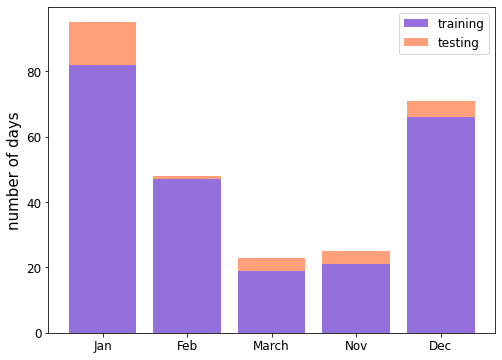

In [26]:
months = ['Jan','Feb','March','Nov','Dec']
plt.figure(figsize=(8,6))
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel("number of days",fontsize=15)
plt.bar(months,list(train_months_count[:3])+list(train_months_count[5:]),color='mediumpurple',label='training')
plt.bar(months,list(test_months_count[:3])+list(test_months_count[5:]),color='lightsalmon',\
        bottom=list(train_months_count[:3])+list(train_months_count[5:]),label='testing')
plt.legend(loc='best',fontsize=12)
# plt.savefig('../../../MS Thesis/Thesis Manuscript v4/figures/RnD/amihan_months.png',dpi=300,bbox_inches='tight')
plt.show()

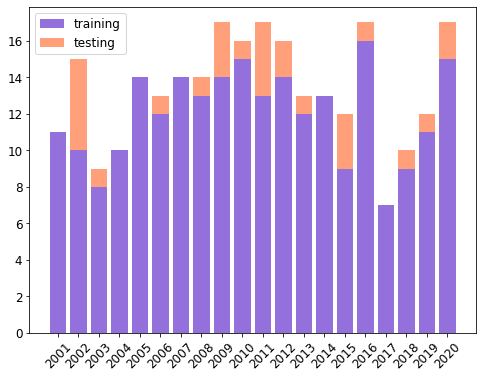

In [15]:
plt.figure(figsize=(8,6))
plt.xticks(size=12,rotation=45)
plt.yticks(size=12)
plt.bar(training_years,train_years_count,color='mediumpurple',label='training')
plt.bar(training_years,test_years_count,color='lightsalmon',bottom=train_years_count,label='testing')
plt.legend(loc='best',fontsize=12)
# plt.savefig('../../For Thesis Manuscript/amihan_years.png',dpi=300,bbox_inches='tight')
plt.show()

### Get randomized training and test SLP

In [23]:
training_SLP = strong_amihan_slp[:,training_index]/strong_amihan_slp[:,training_index].max(axis=0)
test_SLP = strong_amihan_slp[:,test_index]/strong_amihan_slp[:,test_index].max(axis=0)

### Save randomized training and test set to CSV

In [24]:
np.savetxt('../Training/Small Domain/training_SLP.csv',training_SLP,delimiter=',')
np.savetxt('../Training/Small Domain/test_SLP.csv',test_SLP,delimiter=',')

## Read archetypes and weights

In [25]:
MVSA_daily_slp = pd.read_csv('../Training/Small Domain/slp_training_MVSA.csv',header=None)
daily_slp_weights = pd.read_csv('../Training/Small Domain/slp_training_weights.csv',header=None).values

## Find days with threshold SLP weights

In [26]:
slp_archetypes, slp_days = np.where(daily_slp_weights>0.35)

In [27]:
slp_arch_index = training_index[slp_days]
slp_archetype_dates = np.array(training_days)[np.unique(slp_arch_index)]

In [28]:
np.savetxt('../Training/Small Domain/slp_match_days.txt',np.array(slp_archetype_dates).astype(int))

In [29]:
#get years with archetype dates
years = []
for date in slp_archetype_dates:
    years.append(date[:4])

## Filter RH of days that match SLP patterns

In [21]:
strong_amihan_rh.shape

(21, 267)

In [20]:
strong_amihan_rh = pd.read_csv('../strong_amihan_rh.csv',header=None).values

normal_rh = strong_amihan_rh/strong_amihan_rh.max(axis=1)[:,None]

#get training values
training_rh = normal_rh[:,training_index]
#get test values
test_rh = normal_rh[:,test_index]

#get RH of days with matching SLP
matched_rh = training_rh[:,np.unique(slp_days)].T

NameError: name 'slp_days' is not defined

In [31]:
#save matching RH to csv
np.savetxt('../Training/Small Domain/training_RH.csv',matched_rh,delimiter=',')

#save test RH to csv
np.savetxt('../Training/Small Domain/test_RH.csv',test_rh.T,delimiter=',')

## Get days with analogous RH using threshold

In [32]:
#read csv files of archetypes and weights
MVSA_daily_rh = pd.read_csv('../Training/Small Domain/rh_training_MVSA.csv',header=None)
daily_rh_weights = pd.read_csv('../Training/Small Domain/rh_training_weights.csv',header=None).values

#get RHs with dominant archetypes
rh_archetypes, rh_days = np.where(daily_rh_weights>0.4)
rh_archetype_dates = np.array(slp_archetype_dates)[rh_days]

#get years with archetype dates
years = []
for date in rh_archetype_dates:
    years.append(date[:4])

In [33]:
total_mean_rain = np.zeros((191,160,daily_rh_weights.shape[0]))

for j in range(daily_rh_weights.shape[0]):
    index = np.where(rh_archetypes == j)[0]

    year = np.array(years)[index]
    dates = rh_archetype_dates[index]
    days_index = rh_days[index]

    total_rain_matrix = np.zeros((len(dates),160,191))

    for k in range(len(dates)):
        try:
            daily_rain = nc.Dataset('../../Daily Rain/gpm'+year[k]+'/3B-DAY.MS.MRG.3IMERG.'\
                                +dates[k]+'-S000000-E235959.V06.nc4.nc4')
        except FileNotFoundError:
            continue

        rain_data = np.ma.getdata(daily_rain['precipitationCal'][0,:,:])

        total_rain_matrix[k] = rain_data

    #get median total rain
    mean_rain = np.median(total_rain_matrix,axis=0)

    total_mean_rain[:,:,j] = mean_rain.T

np.save('../Training/Small Domain/rh_training_rain.npy',total_mean_rain)

## Calculate scaling between actual and composite

In [34]:
composite_rain_map = np.zeros((total_mean_rain.shape[0],total_mean_rain.shape[1],daily_rh_weights.shape[1]))
actual_rain_map = np.copy(composite_rain_map)

for a in range(daily_rh_weights.shape[1]):
    composite_rain_map[:,:,a] = np.sum(daily_rh_weights[:,a]*total_mean_rain,axis=2)
    
    date = slp_archetype_dates[a]
    year = date[:4]
    
    try:
        daily_rain = nc.Dataset('../../Daily Rain/gpm'+year+'/3B-DAY.MS.MRG.3IMERG.'\
                            +date+'-S000000-E235959.V06.nc4.nc4')
    except FileNotFoundError:
        continue
    
    actual_rain_map[:,:,a] = (np.ma.getdata(daily_rain['precipitationCal'][0,:,:])).T

In [35]:
scale = np.mean(actual_rain_map[26:91,90:130],axis=(0,1))/np.mean(composite_rain_map[26:91,90:130],axis=(0,1))
scale = scale[scale!=0]

In [36]:
np.mean(scale)

1.8024020750654757

### Plot training rainfall vs actual

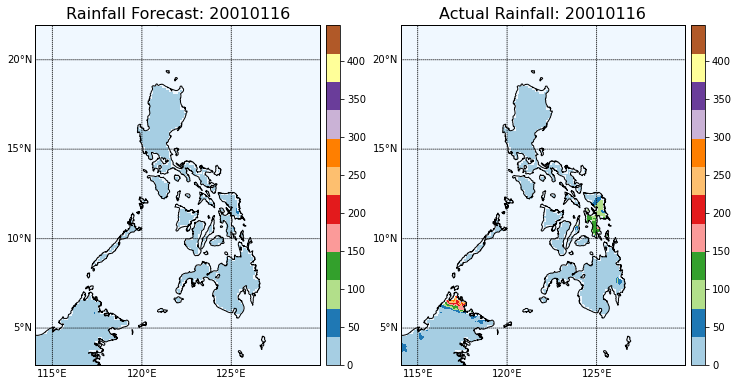

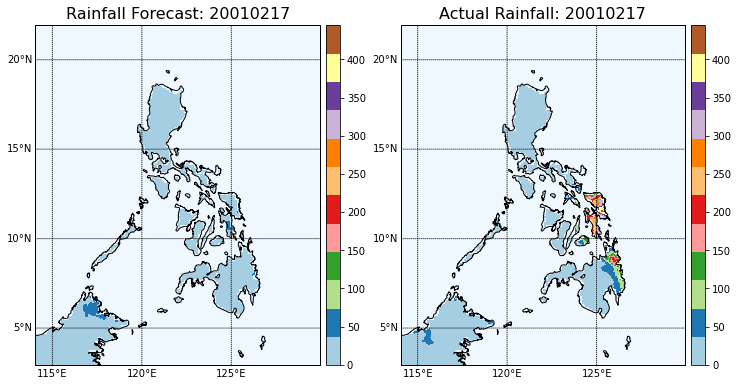

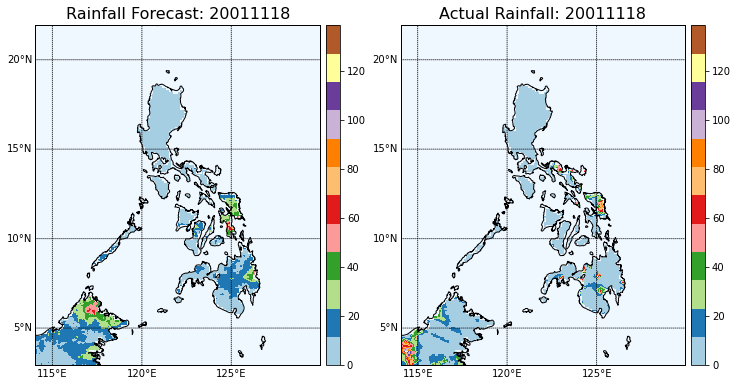

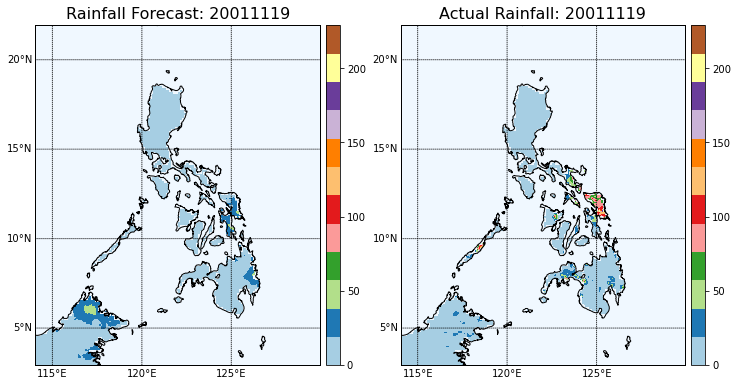

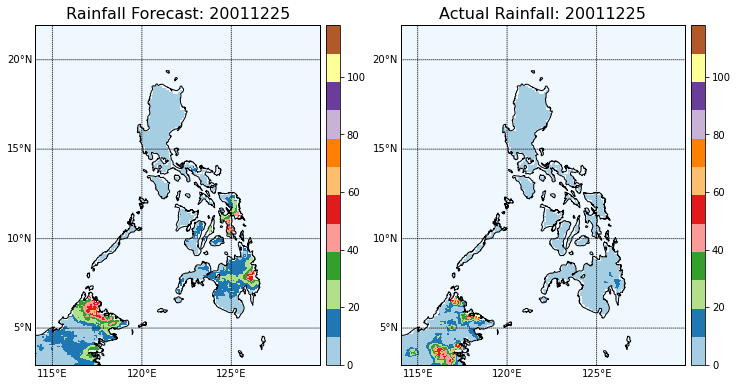

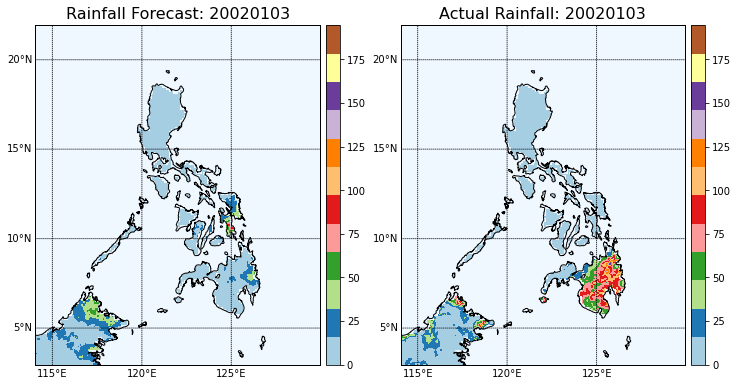

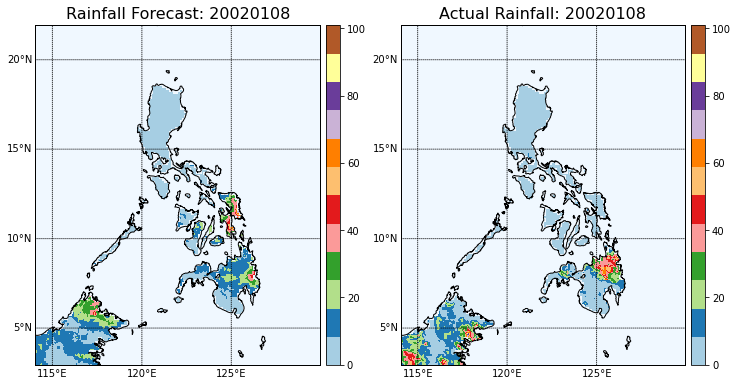

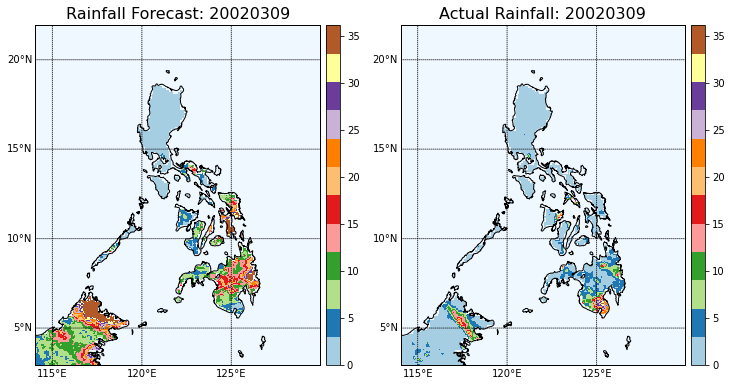

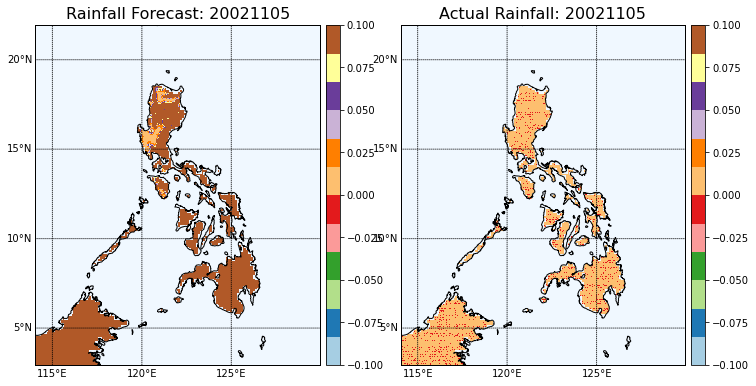

KeyboardInterrupt: 

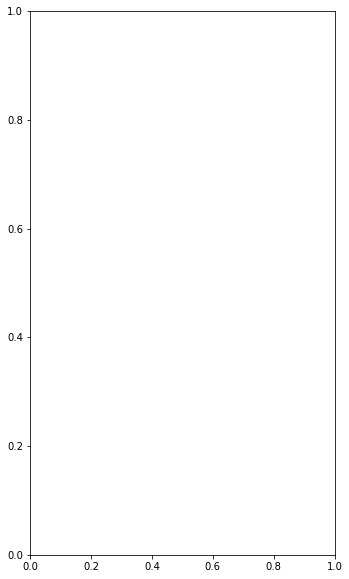

In [37]:
#get latitudes
rain_latitude = np.ma.getdata(daily_rain['lat'])
#get longitudes
rain_longitude = np.ma.getdata(daily_rain['lon'])

lon, lat = np.meshgrid(rain_longitude,rain_latitude)

for j in range(composite_rain_map.shape[2]):
    #get masked actual rain
    actual_rain = actual_rain_map[:,:,j]
    masked_actual = maskoceans(lon,lat,actual_rain,resolution='i')

    #get masked composite rain
    composite_rain = 1.8024020750654757*composite_rain_map[:,:,j] 
    masked_composite = maskoceans(lon,lat,composite_rain,resolution='i')

    fig = plt.figure(figsize=(12, 10))

    #show archetype rain map
    fig.add_subplot(1, 2, 1)

    #draw basemap
    m = Basemap(projection='cyl',llcrnrlon=114.05,urcrnrlon=129.95,llcrnrlat=2.95,urcrnrlat=21.95,resolution='i')
    m.drawcoastlines(linewidth=1)
    m.drawmapboundary(fill_color='aliceblue')

    composite_rain_imshow = m.imshow(masked_composite,cmap='Paired',zorder=1,\
                                     vmin=np.min(masked_actual),vmax=np.max(masked_actual))
    plt.title('Rainfall Forecast: '+slp_archetype_dates[j],fontsize=16)

    #draw latitudes and longitudes
    parallels = np.arange(5,21,5)
    m.drawparallels(parallels,labels=[True,False,True,False])
    meridians = np.arange(115,141,5)
    m.drawmeridians(meridians,labels=[True,False,False,True])

    m.colorbar(composite_rain_imshow,'right',shrink=0.5)

    #show actual rain map
    fig.add_subplot(1, 2, 2)

    #draw basemap
    m = Basemap(projection='cyl',llcrnrlon=114.05,urcrnrlon=129.95,llcrnrlat=2.95,urcrnrlat=21.95,resolution='i')
    m.drawcoastlines(linewidth=1)
    m.drawmapboundary(fill_color='aliceblue')

    actual_rain_imshow = m.imshow(masked_actual,cmap='Paired',zorder=1) 
    plt.title('Actual Rainfall: '+slp_archetype_dates[j],fontsize=16)

    #draw latitudes and longitudes
    parallels = np.arange(5,21,5)
    m.drawparallels(parallels,labels=[True,False,True,False])
    meridians = np.arange(115,141,5)
    m.drawmeridians(meridians,labels=[True,False,False,True])

    m.colorbar(actual_rain_imshow,'right',shrink=0.5)
    
    plt.show()

## Get data on observed rainfall from PAGASA stations

In [4]:
station_id = pd.read_csv('../../Strong Habagat/sta_id.csv',header=None)
station_lon = station_id[1].values
station_lat = station_id[2].values

In [5]:
#consider only weather stations in east Philippines

#find stations at <12 degrees N
lat_ind = station_lat < 13.1 #12.5
station_lat = station_lat[lat_ind]
station_lon = station_lon[lat_ind]

#find stations at >124 degrees E
lon_ind = station_lon > 123 #124.5 
station_lon = station_lon[lon_ind]
station_lat = station_lat[lon_ind]

In [6]:
station_lon

array([123.6166667, 124.6333333, 124.8833333, 125.4333333, 125.7333333,
       123.3      , 123.85     , 123.9666667, 124.8333333, 125.5      ,
       123.35     , 124.2166667, 125.0833333, 125.5166667, 125.65     ,
       126.3333333, 125.1833333])

In [7]:
station_lat

array([12.36666667, 12.48333333, 11.78333333, 11.45      , 11.03333333,
        9.3       ,  9.6       , 10.3       , 10.13333333,  9.8       ,
        8.6       ,  7.16666667,  8.15      ,  9.93333333,  7.11666667,
        8.36666667,  6.11666667])

In [40]:
#get station information of east PH stations
east_PH_df = station_id[(station_id[1].isin(station_lon)) & (station_id[2].isin(station_lat))]

#get indices of east PH stations
east_PH = east_PH_df.index

In [41]:
daily_rain = nc.Dataset('../../Daily Rain/gpm2015/3B-DAY.MS.MRG.3IMERG.20150101-S000000-E235959.V06.nc4.nc4')

#get rainfall latitudes
rain_latitude = np.ma.getdata(daily_rain['lat'])

#get rainfall longitudes
rain_longitude = np.ma.getdata(daily_rain['lon'])

### Find (nearest) index of stations in rainfall grid

In [42]:
lon_ind = []
lat_ind = []

#find nearest corresponding index of stations in rain grid
for i in range(len(station_lon)):
    lon_index = np.abs(rain_longitude-station_lon[i]).argmin()
    lat_index = np.abs(rain_latitude-station_lat[i]).argmin()
    
    lon_ind.append(lon_index)
    lat_ind.append(lat_index)    

In [43]:
#save longitude indices in array
np.save('station_lon_index.npy',lon_ind)

#save latitude indices in array
np.save('station_lat_index.npy',lat_ind)

#save east PH indices in arrray
np.save('eastPH_index.npy',east_PH)

### Load observed rainfall per station 

In [44]:
eastPH = np.load('eastPH_index.npy')
obs_rain = pd.read_csv('../obs_strong_amihan.csv',header=None).values[:,eastPH]

test_obs_rain = obs_rain[test_index]
train_obs_rain = obs_rain[np.unique(slp_days)]

### Load indices of longitude and latitude of PAGASA stations in rain grid

In [45]:
station_lon = np.load('station_lon_index.npy')
station_lat = np.load('station_lat_index.npy')

## Compare forecast and actual rainfall, and calculate contingency table

In [46]:
#heavy rain threshold
threshold_rain = [0.5,20]

#neighbour size of forecast
N = [1,2]

#create array containing contingency table per day for different threshold and neighbour size
cont_table = np.zeros((train_obs_rain.shape[0],5,len(threshold_rain),len(N)))


for t in range(len(threshold_rain)):
    for n in range(len(N)):
        for a in range(train_obs_rain.shape[0]):
            #get composite rain
            composite_rain = 1.8024020750654757*composite_rain_map[:,:,a] 
            
            for b in range(train_obs_rain.shape[1]):
                lat_index = station_lat[b]
                lon_index = station_lon[b]

                #get actual station rain
                actual_station_rain = train_obs_rain[a][b]

                #check if observed rain is missing
                if np.isnan(actual_station_rain):
                    cont_table[a,4,t] += 1

                else:
                    #get composite station rain within grid
                    composite_station_rain = composite_rain[lat_index-N[n]:lat_index+(N[n]+1), \
                                                            lon_index-N[n]:lon_index+(N[n]+1)]

                    #compare actual rain to grid of forecast
                    diff = np.abs(actual_station_rain-composite_station_rain).argmin()
                    forecast_station_rain = composite_station_rain.flatten()[diff]

                    #count hits per day
                    if actual_station_rain >= threshold_rain[t] and forecast_station_rain >= threshold_rain[t]:
                        cont_table[a,0,t,n] += 1

                    #count false alarms per day
                    elif actual_station_rain < threshold_rain[t] and forecast_station_rain >= threshold_rain[t]:
                        cont_table[a,1,t,n] += 1

                    #count misses per day
                    elif actual_station_rain >= threshold_rain[t] and forecast_station_rain < threshold_rain[t]:
                        cont_table[a,2,t,n] += 1

                    #count correct negatives per day
                    else:
                        cont_table[a,3,t,n] += 1

## Calculate contingency scores

In [47]:
# 0 = hits
# 1 = false alarms
# 2 = misses
# 3 = correct negatives

#calculate threat score
ts = cont_table[:,0,:,:]/(cont_table[:,0,:,:]+cont_table[:,1,:,:]+cont_table[:,2,:,:])

#calculate bias
bias = (cont_table[:,0,:,:]+cont_table[:,1,:,:])/(cont_table[:,0,:,:]+cont_table[:,2,:,:])

#calculate probability of detection
pod = cont_table[:,0,:,:]/(cont_table[:,0,:,:]+cont_table[:,2,:,:])

#calculate false alarm ratio
far = cont_table[:,1,:,:]/(cont_table[:,0,:,:]+cont_table[:,1,:,:])

<ipython-input-47-380e9cbdd595>:7: RuntimeWarning: invalid value encountered in true_divide
  ts = cont_table[:,0,:,:]/(cont_table[:,0,:,:]+cont_table[:,1,:,:]+cont_table[:,2,:,:])
<ipython-input-47-380e9cbdd595>:10: RuntimeWarning: divide by zero encountered in true_divide
  bias = (cont_table[:,0,:,:]+cont_table[:,1,:,:])/(cont_table[:,0,:,:]+cont_table[:,2,:,:])
<ipython-input-47-380e9cbdd595>:10: RuntimeWarning: invalid value encountered in true_divide
  bias = (cont_table[:,0,:,:]+cont_table[:,1,:,:])/(cont_table[:,0,:,:]+cont_table[:,2,:,:])
<ipython-input-47-380e9cbdd595>:13: RuntimeWarning: invalid value encountered in true_divide
  pod = cont_table[:,0,:,:]/(cont_table[:,0,:,:]+cont_table[:,2,:,:])
<ipython-input-47-380e9cbdd595>:16: RuntimeWarning: invalid value encountered in true_divide
  far = cont_table[:,1,:,:]/(cont_table[:,0,:,:]+cont_table[:,1,:,:])


In [48]:
np.nanmean(np.ma.masked_invalid(far),axis=0)

masked_array(
  data=[[0.36896321, 0.36554163],
        [0.57039337, 0.34656746]],
  mask=False,
  fill_value=1e+20)

In [53]:
score_df1 = pd.DataFrame(columns=["date","TS","BIAS","POD","FAR"])
score_df2 = pd.DataFrame(columns=["date","TS","BIAS","POD","FAR"])

In [54]:
ts_ind = np.argsort(ts[:,1,1])

score_df1["TS"] = ts[:,0,1][ts_ind][::-1]
score_df1["BIAS"] = bias[:,0,1][ts_ind][::-1]
score_df1["POD"] = pod[:,0,1][ts_ind][::-1]
score_df1["FAR"] = far[:,0,1][ts_ind][::-1]

score_df1["date"]  = slp_archetype_dates[ts_ind][::-1]

In [55]:
score_df2["TS"] = ts[:,1,1][ts_ind][::-1]
score_df2["BIAS"] = bias[:,1,1][ts_ind][::-1]
score_df2["POD"] = pod[:,1,1][ts_ind][::-1]
score_df2["FAR"] = far[:,1,1][ts_ind][::-1]

score_df2["date"]  = slp_archetype_dates[ts_ind][::-1]

In [52]:
score_df1.to_csv("training_scores05.csv")
score_df2.to_csv("training_scores20.csv")

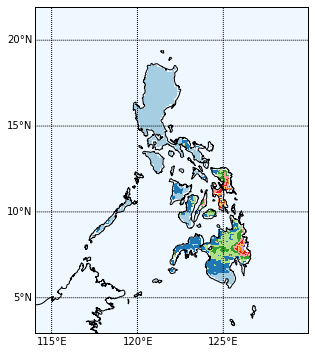

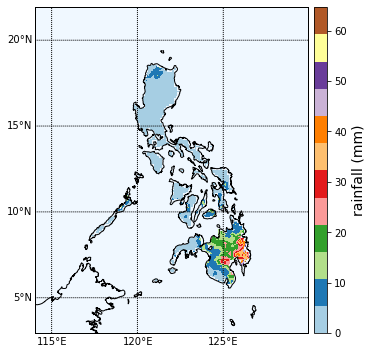

In [44]:
#get latitudes
rain_latitude = np.ma.getdata(daily_rain['lat'])
#get longitudes
rain_longitude = np.ma.getdata(daily_rain['lon'])

lon, lat = np.meshgrid(rain_longitude,rain_latitude)

for j in [19]:#range(composite_rain_map.shape[2]):
    #get masked actual rain
    actual_rain = actual_rain_map[:,:,j] 
    masked_actual = maskoceans(lon,lat,actual_rain,resolution='i')
    masked_actual.mask[:41,:52] = True

    #get masked composite rain
    composite_rain = 1.8024020750654757*composite_rain_map[:,:,j] 
    masked_composite = maskoceans(lon,lat,composite_rain,resolution='i')
    masked_composite.mask[:41,:52] = True

    fig = plt.figure(figsize=(8, 6))

    #draw basemap
    m = Basemap(projection='cyl',llcrnrlon=114.05,urcrnrlon=129.95,llcrnrlat=2.95,urcrnrlat=21.95,resolution='i')
    m.drawcoastlines(linewidth=1)
    m.drawmapboundary(fill_color='aliceblue')

    composite_rain_imshow = m.imshow(masked_composite,cmap='Paired',zorder=1,\
                                     vmin=np.min(masked_actual),vmax=np.max(masked_actual))
#     plt.title('Rainfall Forecast: '+slp_archetype_dates[j],fontsize=16)

    #draw latitudes and longitudes
    parallels = np.arange(5,21,5)
    m.drawparallels(parallels,labels=[True,False,True,False])
    meridians = np.arange(115,141,5)
    m.drawmeridians(meridians,labels=[True,False,False,True])

#     m.colorbar(composite_rain_imshow,'right',shrink=0.5)
    
#     #display contingency scores at 50mm threshold, N=1
#     plt.text(133,22,'HRT = '+str(threshold_rain[0])+' mm, N = '+str(N[0]*2 + 1),fontsize=11)
#     plt.text(134.5,21,'TS = '+str(np.round(ts[j,0,0],3)),fontsize=10)
#     plt.text(134.5,20,'BIAS = '+str(np.round(bias[j,0,0],3)),fontsize=10)
#     plt.text(134.5,19,'POD = '+str(np.round(pod[j,0,0],3)),fontsize=10)
#     plt.text(134.5,18,'FAR = '+str(np.round(far[j,0,0],3)),fontsize=10)

#     #display contingency scores at 75mm threshold, N=1
#     plt.text(133,17,'HRT = '+str(threshold_rain[1])+' mm, N = '+str(N[0]*2 + 1),fontsize=11)
#     plt.text(134.5,16,'TS = '+str(np.round(ts[j,1,0],3)),fontsize=10)
#     plt.text(134.5,15,'BIAS = '+str(np.round(bias[j,1,0],3)),fontsize=10)
#     plt.text(134.5,14,'POD = '+str(np.round(pod[j,1,0],3)),fontsize=10)
#     plt.text(134.5,13,'FAR = '+str(np.round(far[j,1,0],3)),fontsize=10)

#     #display contingency scores at 50mm threshold, N=2
#     plt.text(133,12,'HRT = '+str(threshold_rain[0])+' mm, N = '+str(N[1]*2 + 1),fontsize=11)
#     plt.text(134.5,11,'TS = '+str(np.round(ts[j,1,1],3)),fontsize=10)
#     plt.text(134.5,10,'BIAS = '+str(np.round(bias[j,1,1],3)),fontsize=10)
#     plt.text(134.5,9,'POD = '+str(np.round(pod[j,1,1],3)),fontsize=10)
#     plt.text(134.5,8,'FAR = '+str(np.round(far[j,1,1],3)),fontsize=10)

#     #display contingency scores at 75mm threshold, N=2
#     plt.text(133,7,'HRT = '+str(threshold_rain[1])+' mm, N = '+str(N[1]*2 + 1),fontsize=11)
#     plt.text(134.5,6,'TS = '+str(np.round(ts[j,1,1],3)),fontsize=10)
#     plt.text(134.5,5,'BIAS = '+str(np.round(bias[j,1,1],3)),fontsize=10)
#     plt.text(134.5,4,'POD = '+str(np.round(pod[j,1,1],3)),fontsize=10)
#     plt.text(134.5,3,'FAR = '+str(np.round(far[j,1,1],3)),fontsize=10)

#     plt.savefig('../../../MS Thesis/Thesis Manuscript v4/figures/RnD/Strong Amihan/small_rain_'+str(slp_archetype_dates[j])\
#                 +'.png',dpi=300,bbox_inches='tight')
    plt.show()

    fig = plt.figure(figsize=(8, 6))

    #draw basemap
    m = Basemap(projection='cyl',llcrnrlon=114.05,urcrnrlon=129.95,llcrnrlat=2.95,urcrnrlat=21.95,resolution='i')
    m.drawcoastlines(linewidth=1)
    m.drawmapboundary(fill_color='aliceblue')

    actual_rain_imshow = m.imshow(masked_actual,cmap='Paired',zorder=1) 
#     plt.title('Actual Rainfall: '+test_days[j],fontsize=16)

    #draw latitudes and longitudes
    parallels = np.arange(5,21,5)
    m.drawparallels(parallels,labels=[True,False,True,False])
    meridians = np.arange(115,141,5)
    m.drawmeridians(meridians,labels=[True,False,False,True])
    
    cb = m.colorbar(actual_rain_imshow,'right',shrink=0.5)
    cb.set_label(label="rainfall (mm)",fontsize=14)
        
#     plt.savefig('../../../MS Thesis/Thesis Manuscript v4/figures/RnD/Strong Amihan/actualrain_'+str(slp_archetype_dates[j])\
#                 +'.png', dpi=300,bbox_inches='tight')
    
    plt.show()